In [15]:
###
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


První soubor nám definuje průběh generace-fitness pro všechny běhy.

In [34]:
###
df_fit = pd.read_csv("app_runs.csv")
df_fit


,run,generation,fit
0,run_0,0.0,0.02
1,run_0,10.0,0.12
2,run_0,20.0,0.16
3,run_0,30.0,0.26
4,run_0,40.0,0.53
...,...,...,...
545,run_49,60.0,0.35
546,run_49,70.0,0.56
547,run_49,80.0,0.58
548,run_49,90.0,0.66


Druhý soubor nám agreguje poslední řádek (souhrnné informace) z jendotlivých souborů:

In [35]:
###
df_all = pd.read_csv("app_configs.csv")
df_all


,run,time,method
0,run_0,23.478780,meth1
1,run_1,105.012204,meth1
2,run_2,107.339958,meth2
3,run_3,47.289800,meth1
4,run_4,81.382943,meth1
5,run_5,61.500139,meth3
6,run_6,99.757781,meth2
7,run_7,112.808529,meth1
8,run_8,59.346794,meth1
9,run_9,74.066054,meth1


## Úkol 1: vykreslení konvergenčních křivek pro různé metody

In [43]:
# musíme připojit k df_fit i metodu:
df_fit2 = df_fit.merge(df_all[["method", "run"]], on="run")
df_fit2


,run,generation,fit,method
0,run_0,0.0,0.02,meth1
1,run_0,10.0,0.12,meth1
2,run_0,20.0,0.16,meth1
3,run_0,30.0,0.26,meth1
4,run_0,40.0,0.53,meth1
...,...,...,...,...
545,run_49,60.0,0.35,meth2
546,run_49,70.0,0.56,meth2
547,run_49,80.0,0.58,meth2
548,run_49,90.0,0.66,meth2


<AxesSubplot:xlabel='generation', ylabel='fit'>

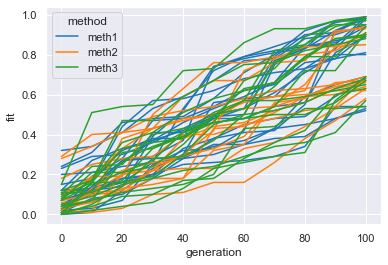

In [68]:
# Vykreslení všech běhů bez agregace
sns.set_theme("notebook", "darkgrid", "tab10")
sns.lineplot(data=df_fit2, x="generation", y="fit",
             hue="method", units="run", estimator=None)


In [69]:
# abychom mohli data agregovat, musime si overit, ze pro vsechny X mame stejny pocet Y (jinak bychom je museli doplnit)
df_fit2.groupby("generation").agg({"fit": "count"})


,fit
generation,
0.0,50
10.0,50
20.0,50
30.0,50
40.0,50
50.0,50
60.0,50
70.0,50
80.0,50


<AxesSubplot:xlabel='generation', ylabel='fit'>

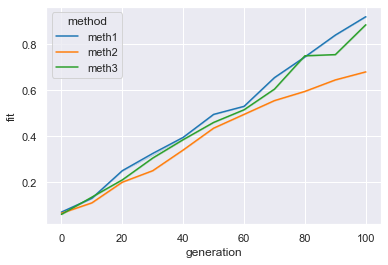

In [70]:
# Vykreslení průměrů s ci
sns.lineplot(data=df_fit2, x="generation", y="fit",
             hue="method", estimator=np.median, ci=0)
# muzeme pak zmenit na median


## Úkol 2: jakou metodou jsme dosáhli nejlepšího výsledku?

In [71]:
# Staci nam pro kazdy beh urcit maximalni fitness
df_best = df_fit.groupby("run").agg({"fit": "max"})
# a je nutne samozrejme pripojit i metodu a pripojime i cas
df_best = df_best.merge(df_all, left_index=True, right_on="run")
df_best


,fit,run,time,method
0,0.99,run_0,23.478780,meth1
1,0.80,run_1,105.012204,meth1
10,0.98,run_10,117.096893,meth1
11,0.95,run_11,119.130351,meth1
12,0.94,run_12,137.498636,meth3
13,0.90,run_13,54.245121,meth1
14,0.99,run_14,77.176160,meth3
15,0.94,run_15,108.444589,meth1
16,0.98,run_16,65.523199,meth1
17,0.93,run_17,36.106088,meth2


[(0.0, 1.0135)]

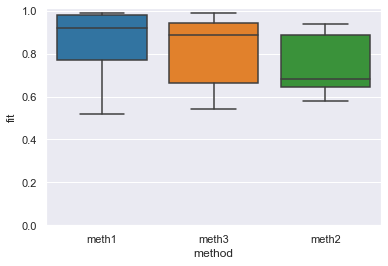

In [72]:
# Ukažme pomocí boxplotu nejlepší fitness pro všechny 3 metody
ax = sns.boxplot(data=df_best, x="method", y="fit", palette="tab10")
ax.set(ylim=(0, None))


<AxesSubplot:xlabel='method', ylabel='time'>

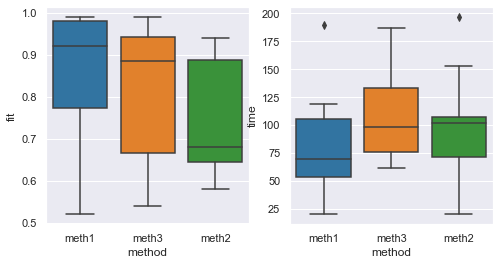

In [73]:
# Co když chceme porovnat i časy, jak dlouho to jelo? ¨
# metoda1: podgrafy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.boxplot(data=df_best, x="method", y="fit", ax=ax1)
sns.boxplot(data=df_best, x="method", y="time", ax=ax2)


In [74]:
# můžeme však i využít Figure-level graf!
# vadí nám ale široký formát
df_best2 = pd.melt(df_best, ["run", "method"], ["fit", "time"])
df_best2


,run,method,variable,value
0,run_0,meth1,fit,0.990000
1,run_1,meth1,fit,0.800000
2,run_10,meth1,fit,0.980000
3,run_11,meth1,fit,0.950000
4,run_12,meth3,fit,0.940000
...,...,...,...,...
95,run_5,meth3,time,61.500139
96,run_6,meth2,time,99.757781
97,run_7,meth1,time,112.808529
98,run_8,meth1,time,59.346794


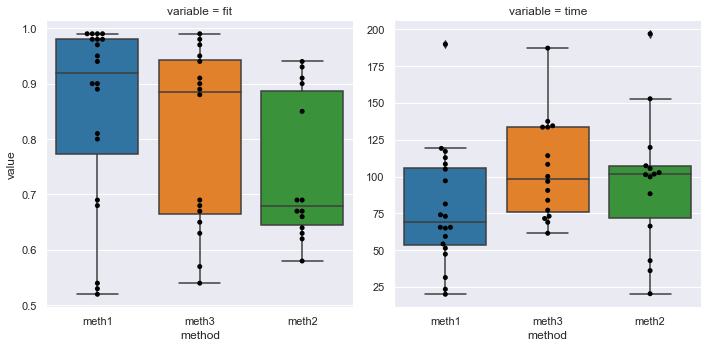

In [75]:
# nyní můžeme nakreslit figure-level graf
g = sns.catplot(data=df_best2, kind="box", x="method",
                y="value", col="variable", sharey=False)
# můžeme přidat i tečky s jednotlivými položkami (swamplot)
g.map(sns.swarmplot, "method", "value", color="k")
